# Project: Investigate a TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project explores a dataset containing information about 10,000 movies collected from The Movie Database (TMDb). The dataset includes information like the title of the movies, year of release, budget, revenue, genre, user ratings and more. Hence, this project wants to know how the movies perform based on the revenue, popularity, user ratings, year of release, and genre. It will consider the relationship between revenue and popularity, and between revenue and number of votes.  

In [2]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')

### Data Cleaning

In [5]:
# Drop columns not necessary for the data analysis
df_mov = df.drop(columns =['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords'])

In [17]:
#remove | from genres and split to new columns
split_genres = df_mov["genres"].str.split("|", expand=True)
# Assign the columns to the original dataframe
df_mov["genre1"] = split_genres[0]
df_mov["genre2"] = split_genres[1]
df_mov["genre3"] = split_genres[2]
df_mov["genre4"] = split_genres[3]
df_mov["genre5"] = split_genres[4]

In [20]:
df_mov.isnull().sum()

popularity                  0
budget                      0
revenue                     0
original_title              0
cast                       76
director                   44
runtime                     0
genres                     23
production_companies     1030
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
genre1                     23
genre2                   2351
genre3                   5787
genre4                   8885
genre5                  10324
dtype: int64

In [22]:
# replacing na values in the columns
df_mov["cast"].fillna("No Cast", inplace = True)
df_mov["director"].fillna("No Director", inplace = True)
df_mov["genres"].fillna("No Genre", inplace = True)
df_mov["production_companies"].fillna("Not Available", inplace = True)

In [223]:
#check zero values for popularity
(df_mov['popularity'] == 0).sum()

0

In [224]:
#check zero values for budget
(df_mov['budget'] == 0).sum()

5696

In [225]:
#check zero values for revenue
(df_mov['revenue'] == 0).sum()

6016

In [226]:
#check zero values for runtime
(df_mov['runtime'] == 0).sum()

31

In [227]:
#check zero values for vote count
(df_mov['vote_count'] == 0).sum()

0

In [228]:
#check zero values for vote average
(df_mov['vote_average'] == 0).sum()

0

In [230]:
#check zero values for budget_adj
(df_mov['budget_adj'] == 0).sum()

5696

In [231]:
#check zero values for revenue_adj
(df_mov['revenue_adj'] == 0).sum()

6016

In [235]:
# replace all zero values with NaN
df_mov = df_mov.replace(0, np.nan)
#confirm replacements with revenue_adj column
(df_mov['revenue_adj'] == 0).sum()

0

In [8]:
#check duplicated rows
df_mov[df_mov.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,Crime,Drama,Action,Thriller,Science Fiction


In [19]:
#drop the duplicate
df_mov.drop_duplicates(keep='first', inplace=True)
#confirm the removal 
df_mov[df_mov.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5


<a id='eda'></a>
## Exploratory Data Analysis



In [19]:
#define function to query popularity values > 5
def countvalue(x):
    if x > 5:
        return x

In [20]:
#check movies with popularity values > 5 
df_mov['popularity'].apply(countvalue).count()

85

##### Only eleven (11) movies have a popularity value higher than 5

# Top 20 Movies with the highest revenue

In [277]:
# find maximum revenue
df_mov["revenue"].max()

2781505847.0

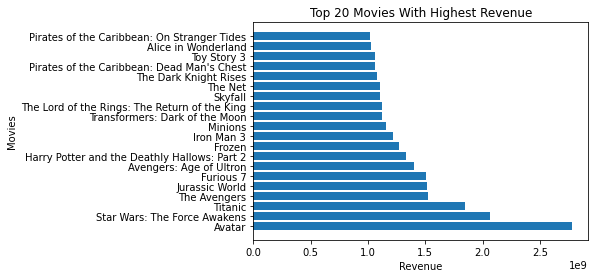

In [36]:
# sort revenue in descending order 
sort_revenues = df_mov.sort_values(by=['revenue'], ascending=False)
# Select first 20 movies with the highest revenue
highest_revenues = sort_revenues.head(20)
# plot a bar chart showing the 20 movies
plt.barh(highest_revenues['original_title'], highest_revenues['revenue']);
plt.title('Top 20 Movies With Highest Revenue', color='black');
plt.xlabel("Revenue");
plt.ylabel("Movies");

##### The revenue of each of the top 20 movies with the highest revenue is over 1 billion dollar. Avatar is the first, followed by Star Wars: The Force Awakens, Titanic, and others. 

### Percentage Profit of the Top 20 Movies with the highest revenue

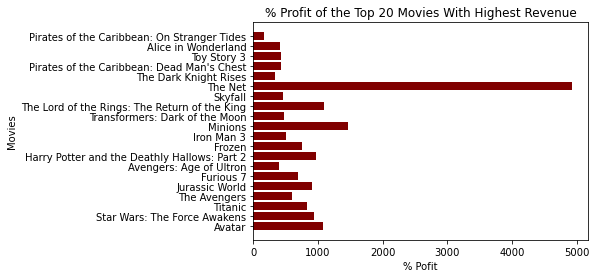

In [8]:
# Subtract budget from revenue to calculate profit
highest_revenues = highest_revenues.assign(profit= highest_revenues['revenue'] - highest_revenues['budget'])
#calculate percentage profit 
highest_revenues = highest_revenues.assign(percent_profit= (highest_revenues['profit'] / highest_revenues['budget']) * 100)
# plot bar chart showing percentage profit
plt.barh(highest_revenues['original_title'], highest_revenues['percent_profit'], color="maroon");
plt.title('% Profit of the Top 20 Movies With Highest Revenue', color='black');
plt.xlabel("% Pofit");
plt.ylabel("Movies");

##### The percentage profit of The Net is remarkably high (close to 5000%) despite being the fifteenth in the list of top 20 with highest revenue. Avatar with the highest revenue recorded a percentage profit a little above 1000%. 

### Popularity of the Top 20 Movies with the highest revenue

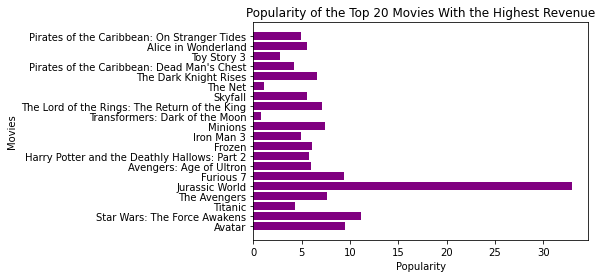

In [9]:
# plot bar chart showing popularity 
plt.barh(highest_revenues['original_title'], highest_revenues['popularity'], color="purple");
plt.title('Popularity of the Top 20 Movies With the Highest Revenue', color='black');
plt.xlabel("Popularity");
plt.ylabel("Movies");

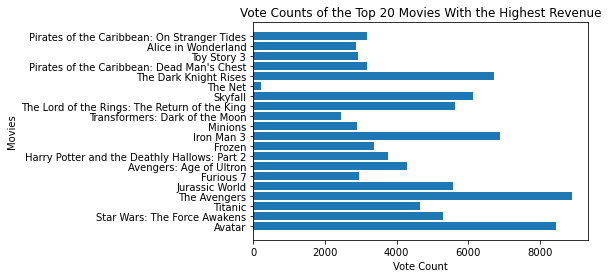

In [10]:
# plot bar chart showing vote count
plt.barh(highest_revenues['original_title'], highest_revenues['vote_count']);
plt.title('Vote Counts of the Top 20 Movies With the Highest Revenue', color='black');
plt.xlabel("Vote Count");
plt.ylabel("Movies");

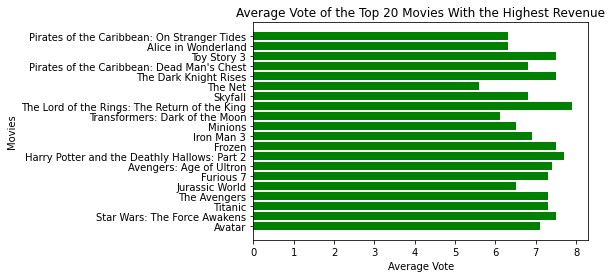

In [12]:
# plot bar chart showing average vote
plt.barh(highest_revenues['original_title'], highest_revenues['vote_average'], color='green');
plt.title('Average Vote of the Top 20 Movies With the Highest Revenue', color='black');
plt.xlabel("Average Vote");
plt.ylabel("Movies");

##### The popularity of Avatar is not up to 10 despite having the highest revenue. However, it is the second most-voted-for movie after the avengers with an average vote a little above 7.0. Jurassic World is the most popular while The Net which recorded the highest percent profit is nineteenth in popularity. 

In [11]:
#counts for year of release 
highest_revenues['release_year'].value_counts()

2015    5
2012    3
2011    3
2013    2
2010    2
2009    1
1997    1
2003    1
1995    1
2006    1
Name: release_year, dtype: int64

##### Fifteen (15) out of the top 20 movies with the highest revenue were released between 2010 and 2015. Three of the 20 were released between 2000 and 2009, while the remaining two were released in the 1990s.

### Genres of the Top 20 Movies with the highest revenue

In [25]:
# Replace none values in genre columns with na
highest_revenues = highest_revenues.fillna(value=np.nan)
# get the list of genres
genres_highest_revenues = pd.concat([highest_revenues['genre1'], highest_revenues['genre2'], highest_revenues['genre3'], highest_revenues['genre4'],
           highest_revenues['genre5']]).value_counts()
genres_highest_revenues

Adventure          15
Action             14
Science Fiction     7
Fantasy             7
Thriller            6
Family              5
Drama               3
Animation           3
Crime               3
Comedy              2
Romance             1
Mystery             1
dtype: int64

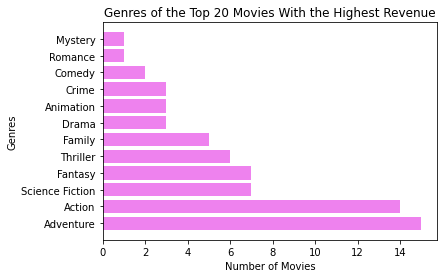

In [32]:
# draw a bar chart for the genres
number = list(genres_highest_revenues.keys())
values = list(genres_highest_revenues)
plt.barh(number, values, color='violet');
plt.title('Genres of the Top 20 Movies With the Highest Revenue', color='black');
plt.xlabel("Number of Movies");
plt.ylabel("Genres");

###### The genres of the top 20 movies with highest revenue include Action, Drama, Science fiction, Adventure, Animation, Family, Crime, Romance, Fantasy, Thriller, Mystery and Comedy. The majority of them belong to the adventure and action genres.

### What is the relationship between revenue and popularity for the top 20 with the highest revenue?

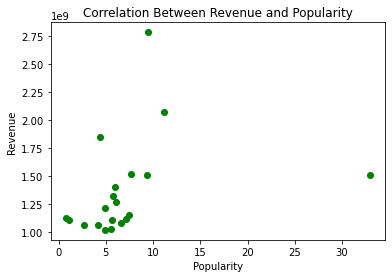

In [39]:
# scatter plot for revenue against popularity
plt.scatter(highest_revenues['popularity'], highest_revenues['revenue'], color='green');
plt.title('Correlation Between Revenue and Popularity', color='black');
plt.xlabel("Popularity");
plt.ylabel("Revenue");

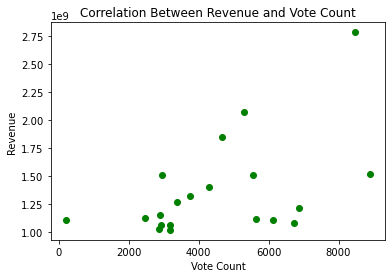

In [41]:
# scatter plot for revenue against vote count
plt.scatter(highest_revenues['vote_count'], highest_revenues['revenue'], color='green');
plt.title('Correlation Between Revenue and Vote Count', color='black');
plt.xlabel("Vote Count");
plt.ylabel("Revenue");

##### It seems there is a positive correlation between revenue and popularity, as well as between revenue and vote count

# 20 Most Popular Movies 

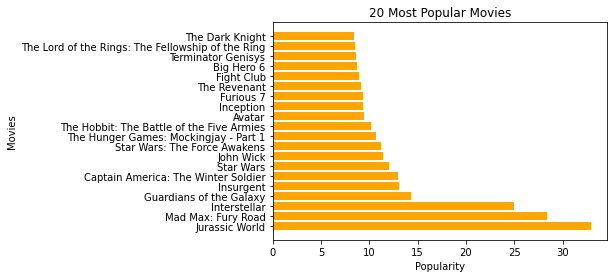

In [48]:
# sort popularity in descending order 
sort_popularity = df_mov.sort_values(by=['popularity'], ascending=False)
#First 20 most popular movies
most_popular = sort_popularity.head(20)
# bar chart for the 20 most popular movies
plt.barh(most_popular['original_title'], most_popular['popularity'], color="orange");
plt.title('20 Most Popular Movies');
plt.xlabel("Popularity");
plt.ylabel("Movies");

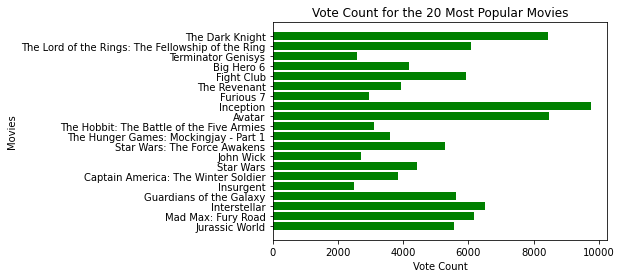

In [51]:
# plot bar chart showing number of votes for the 20 most popular movies
plt.barh(most_popular['original_title'], most_popular['vote_count'], color="green");
plt.title('Vote Count for the 20 Most Popular Movies');
plt.xlabel("Vote Count");
plt.ylabel("Movies");

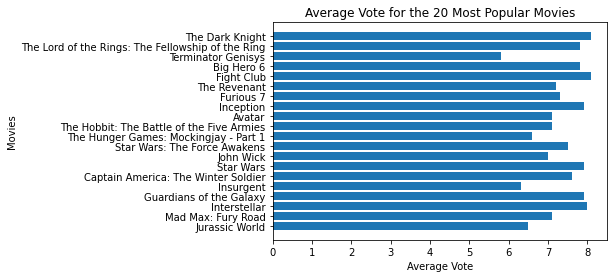

In [55]:
# plot bar chart showing average votes for the 20 most popular movies
plt.barh(most_popular['original_title'], most_popular['vote_average']);
plt.title('Average Vote for the 20 Most Popular Movies');
plt.xlabel("Average Vote");
plt.ylabel("Movies");

##### The first three most popular movies include Jurassic World, Mad Max: Fury Road, and Interstellar. However, Inception recorded the highest number of votes, followed by Avatar and The Dark Knight. 

### Revenues of the 20 Most Popular Movies

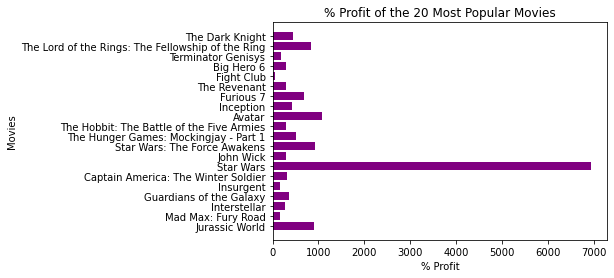

In [58]:
# Subtract budget from revenue to calculate profit
most_popular = most_popular.assign(profit= most_popular['revenue'] - most_popular['budget'])
#calculate percentage profit 
most_popular = most_popular.assign(percent_profit= (most_popular['profit'] / most_popular['budget']) * 100)
# plot bar chart showing percentage profit
plt.barh(most_popular['original_title'], most_popular['percent_profit'], color="purple");
plt.title('% Profit of the 20 Most Popular Movies');
plt.xlabel("% Profit");
plt.ylabel("Movies");

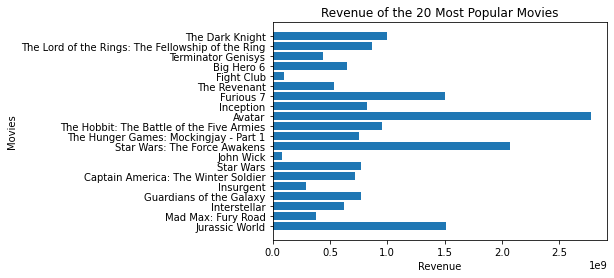

In [84]:
# plot bar chart showing revenues for the 20 most popular movies
plt.barh(most_popular['original_title'], most_popular['revenue']);
plt.title('Revenue of the 20 Most Popular Movies');
plt.xlabel("Revenue");
plt.ylabel("Movies");

##### Avatar recorded the highest revenue out of the 20 most popular movies despite being the twelfth most popular while Star Wars had the highest percentage profit. Jurrasic World recorded the third-highest revenue despite being the most popular. 

#### Genres of the 20 Most Popular Movies

In [60]:
# Replace none values in genre columns with na
most_popular = most_popular.fillna(value=np.nan)
# get the list of genres
genres_most_popular = pd.concat([most_popular['genre1'], most_popular['genre2'], most_popular['genre3'], most_popular['genre4'],
           most_popular['genre5']]).value_counts()

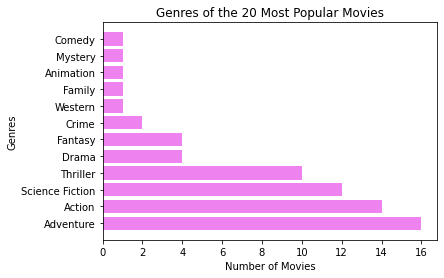

In [63]:
# draw a bar chart for the genres
number = list(genres_most_popular.keys())
values = list(genres_most_popular)
plt.barh(number, values, color='violet');
plt.title('Genres of the 20 Most Popular Movies');
plt.xlabel("Number of Movies");
plt.ylabel("Genres");

##### The majority of the 20 most popular movies belong to the Adventure, Action, Science Fiction, and Thriller genres. 

In [62]:
#counts for year of release 
most_popular['release_year'].value_counts()

2015    7
2014    7
1977    1
2009    1
2010    1
1999    1
2001    1
2008    1
Name: release_year, dtype: int64

##### The majority of the 20 most popular movies were released between 2014 and 2015. 

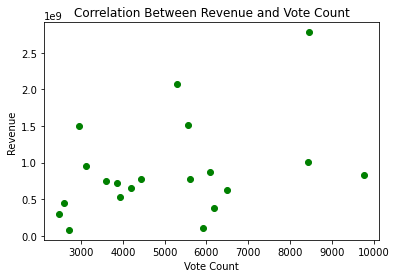

In [70]:
# scatter plot for revenue against vote count
plt.scatter(most_popular['vote_count'], most_popular['revenue'], color='green');
plt.title('Correlation Between Revenue and Vote Count', color='black');
plt.xlabel("Vote Count");
plt.ylabel("Revenue");

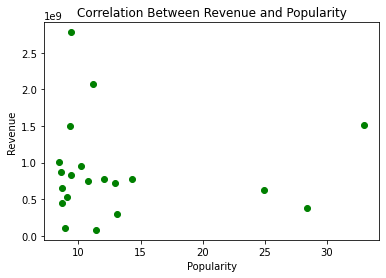

In [69]:
# scatter plot for revenue against popularity
plt.scatter(most_popular['popularity'], most_popular['revenue'], color='green');
plt.title('Correlation Between Revenue and Popularity', color='black');
plt.xlabel("Popularity");
plt.ylabel("Revenue");

##### It seems there is no correlation between revenue and popularity for the 20 most popular movies.

### What is the correlation between vote count and revenue for all movies?

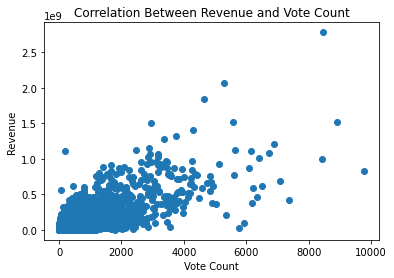

In [74]:
# Subtract budget from revenue to calculate profit
df_mov = df_mov.assign(profit= df_mov['revenue'] - df_mov['budget'])
#calculate percentage profit 
df_mov = df_mov.assign(percent_profit= (df_mov['profit'] / df_mov['budget']) * 100)
# scatter plot for revenue against vote count
plt.scatter(df_mov['vote_count'], df_mov['revenue']);
plt.title('Correlation Between Revenue and Vote Count', color='black');
plt.xlabel("Vote Count");
plt.ylabel("Revenue");

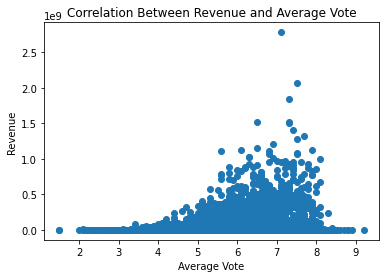

In [76]:
# scatter plot for revenue against average vote
plt.scatter(df_mov['vote_average'], df_mov['revenue']);
plt.title('Correlation Between Revenue and Average Vote');
plt.xlabel("Average Vote");
plt.ylabel("Revenue");

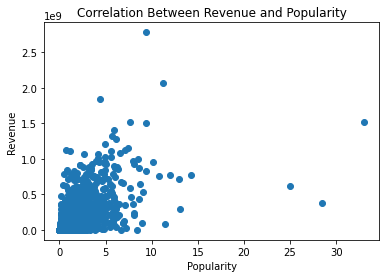

In [80]:
# scatter plot for revenue against popularity 
plt.scatter(df_mov['popularity'], df_mov['revenue']);
plt.title('Correlation Between Revenue and Popularity');
plt.xlabel("Popularity");
plt.ylabel("Revenue");

##### For all the movies, there is a positive correlation between revenue and vote count. 

<a id='conclusions'></a>
## Conclusions

> This project explored the performance of the movies based on the revenue, popularity, user ratings, year of release, and genre. It considered the performance of the top 20 movies with the highest revenue and looked into the correlation between revenue and popularity, as well as between revenue and number of votes. It seems there is a positive correlation between revenue and popularity, as well as between revenue and number of votes. The genres of the top 20 movies with the highest revenue include Action, Drama, Science fiction, Adventure, Animation, Family, Crime, Romance, Fantasy, Thriller, Mystery and Comedy. The majority of them belong to the Adventure and Action genres. The majority of the top 20 movies with the highest revenue (15) were released between 2010 and 2015.

> A look into the 20 most popular movies and the correlation between revenue and popularity, as well as between revenue and number of votes, revealed negative correlations. The majority of the 20 most popular movies belong to the Adventure, Action, Science Fiction, and Thriller genres. Likewise, the majority were released between 2014 and 2015. A positive correlation between revenue and vote count was observed for all the movies in the dataset. 

> However, it seems the budget for a number of movies is incorrect as comapred with factual information. Hence, it was impossible to explore the data in terms of the movies with the highest percent profit. 